<a href="https://colab.research.google.com/github/preetamjumech/abalone_dataset/blob/main/Preetam_Saha_Abalone_dataset_27_08_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data

--2022-07-27 17:45:34--  https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 191873 (187K) [application/x-httpd-php]
Saving to: ‘abalone.data.1’

abalone.data.1      100%[===================>] 187.38K  --.-KB/s    in 0.08s   

2022-07-27 17:45:34 (2.19 MB/s) - ‘abalone.data.1’ saved [191873/191873]



In [64]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
matplotlib.rcParams["figure.figsize"]=(20,10)

In [65]:
df = pd.read_csv("/content/abalone.data",header=None)
df.head()

,0,1,2,3,4,5,6,7,8
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [66]:
df.shape

(4177, 9)

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       4177 non-null   object 
 1   1       4177 non-null   float64
 2   2       4177 non-null   float64
 3   3       4177 non-null   float64
 4   4       4177 non-null   float64
 5   5       4177 non-null   float64
 6   6       4177 non-null   float64
 7   7       4177 non-null   float64
 8   8       4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


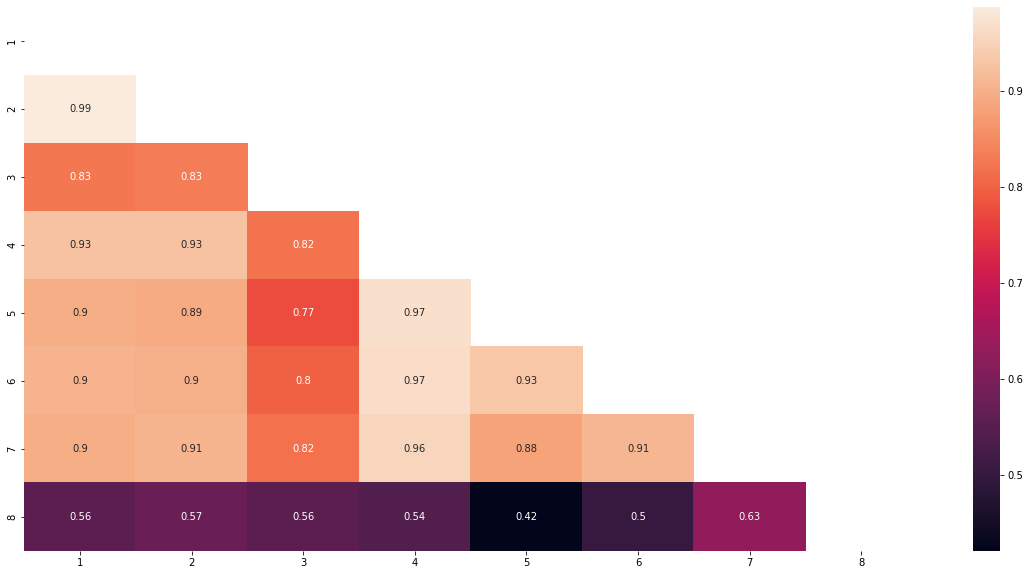

In [68]:
corr=df.corr()
mask=np.triu(np.ones_like(corr,dtype=bool))
sns.heatmap(corr,mask=mask,annot=True)

In [85]:
# Add age column
y = df[8] + 1.5

# Drop rings column
df1 = df.drop(8, axis=1)
print(df1.head())

   0      1      2      3       4       5       6      7
0  M  0.455  0.365  0.095  0.5140  0.2245  0.1010  0.150
1  M  0.350  0.265  0.090  0.2255  0.0995  0.0485  0.070
2  F  0.530  0.420  0.135  0.6770  0.2565  0.1415  0.210
3  M  0.440  0.365  0.125  0.5160  0.2155  0.1140  0.155
4  I  0.330  0.255  0.080  0.2050  0.0895  0.0395  0.055


In [86]:
y

0       16.5
1        8.5
2       10.5
3       11.5
4        8.5
        ... 
4172    12.5
4173    11.5
4174    10.5
4175    11.5
4176    13.5
Name: 8, Length: 4177, dtype: float64

In [71]:
from itertools import combinations
c = list(combinations(df1.columns[1:],2))
c

[(1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (1, 6),
 (1, 7),
 (2, 3),
 (2, 4),
 (2, 5),
 (2, 6),
 (2, 7),
 (3, 4),
 (3, 5),
 (3, 6),
 (3, 7),
 (4, 5),
 (4, 6),
 (4, 7),
 (5, 6),
 (5, 7),
 (6, 7)]

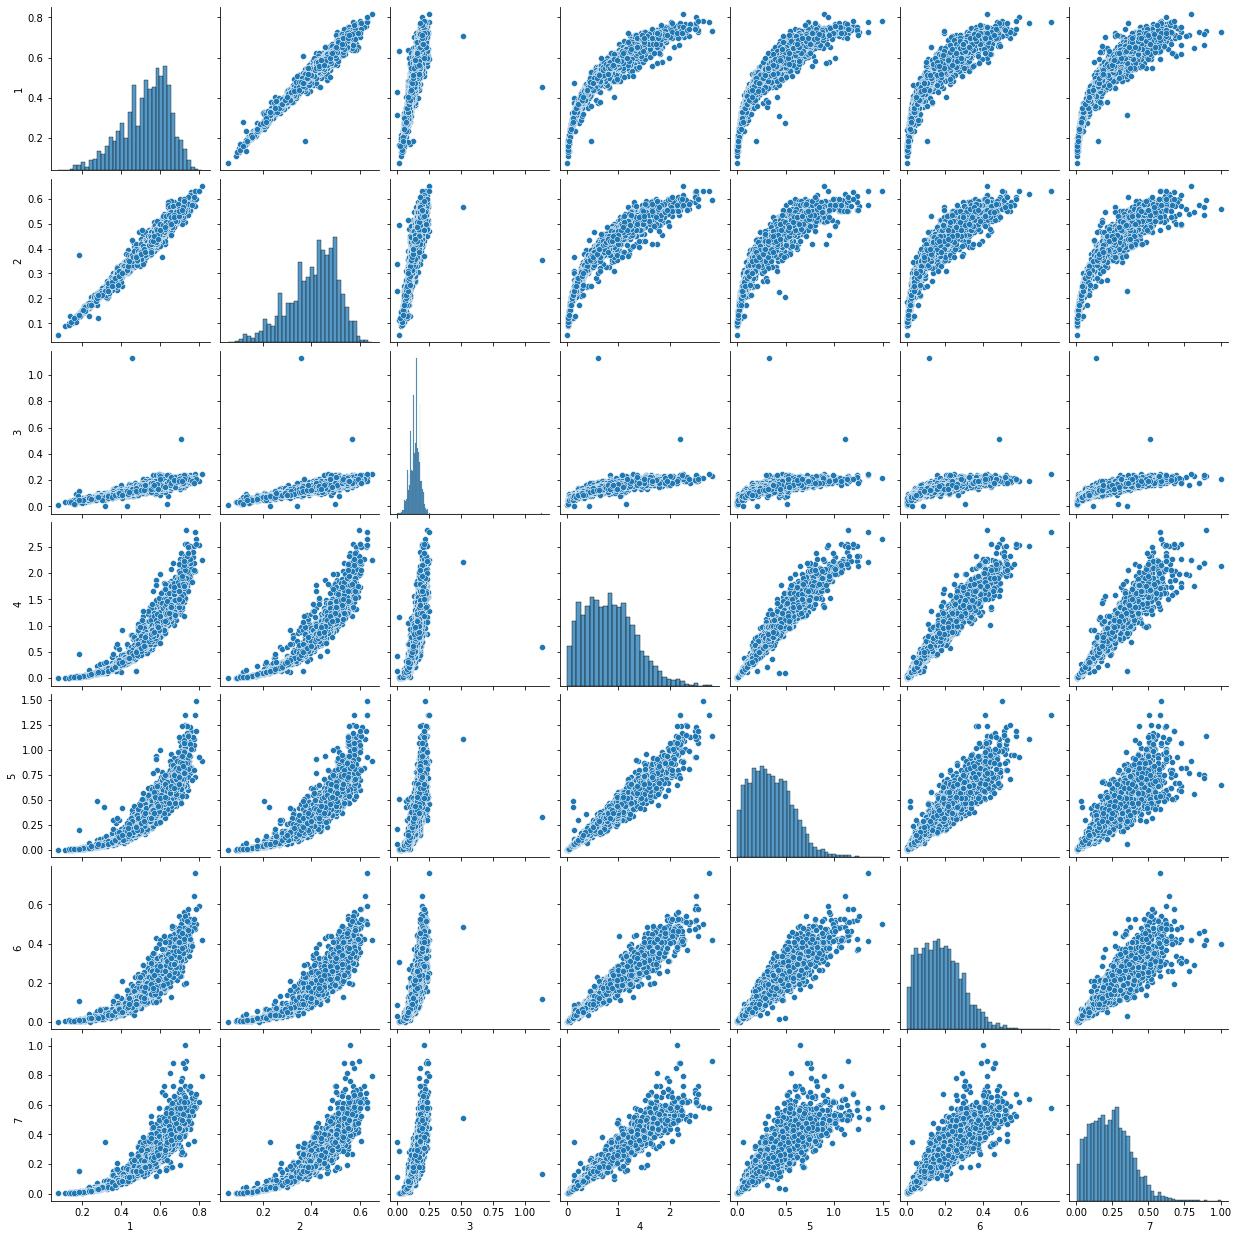

In [72]:
sns.pairplot(df1)

In [73]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler

In [74]:
from sklearn.model_selection import cross_val_score
score_d={}
for i in c:
    dt=DecisionTreeRegressor()
    X=df1[i[0]].values.reshape(-1,1)
    y=df1[i[1]].values.reshape(-1,1)
    score=cross_val_score(dt,X,y,cv=6,scoring="r2").mean()
    score_d[i]=score

In [75]:
score_d

{(1, 2): 0.9716592592447214,
 (1, 3): 0.7191506184950889,
 (1, 4): 0.926979285320756,
 (1, 5): 0.8742276770184577,
 (1, 6): 0.8791288270021363,
 (1, 7): 0.847657696803879,
 (2, 3): 0.7336411321339682,
 (2, 4): 0.9239609465936716,
 (2, 5): 0.8515300142881027,
 (2, 6): 0.8673206753328463,
 (2, 7): 0.8682941081916259,
 (3, 4): 0.7933343589206423,
 (3, 5): 0.6632473358410872,
 (3, 6): 0.7492494675056897,
 (3, 7): 0.8061542736678482,
 (4, 5): 0.8819920028566273,
 (4, 6): 0.8790231583341296,
 (4, 7): 0.8358256352328929,
 (5, 6): 0.7974657065210661,
 (5, 7): 0.6316850981863001,
 (6, 7): 0.7525831439646833}

In [47]:
k=dict(sorted(score_d.items(),key=lambda x:x[1],reverse=True))
for i in k:
    print(i,k[i])

(1, 2) 0.9716592592447214
(1, 4) 0.926979285320756
(2, 4) 0.9239609465936716
(4, 5) 0.8819920028566273
(1, 6) 0.8791288270021363
(4, 6) 0.8790231583341296
(1, 5) 0.8742276770184577
(2, 7) 0.8682941081916259
(2, 6) 0.8673206753328463
(2, 5) 0.8515300142881027
(1, 7) 0.847657696803879
(4, 7) 0.8358256352328929
(3, 7) 0.8061542736678482
(5, 6) 0.7974657065210661
(3, 4) 0.7933343589206423
(6, 7) 0.7525831439646833
(3, 6) 0.7492494675056897
(2, 3) 0.7336411321339682
(1, 3) 0.7191506184950889
(3, 5) 0.6632473358410872
(5, 7) 0.6316850981863001


In [76]:
cat=pd.get_dummies(df1[0],drop_first=True)
cat

,I,M
0,0,1
1,0,1
2,0,0
3,0,1
4,1,0
...,...,...
4172,0,0
4173,0,1
4174,0,1
4175,0,0


In [77]:
X=pd.concat([cat,df1.iloc[:,1:]],axis=1)
X.head()

,I,M,1,2,3,4,5,6,7
0,0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,0,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,0,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,0,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,1,0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


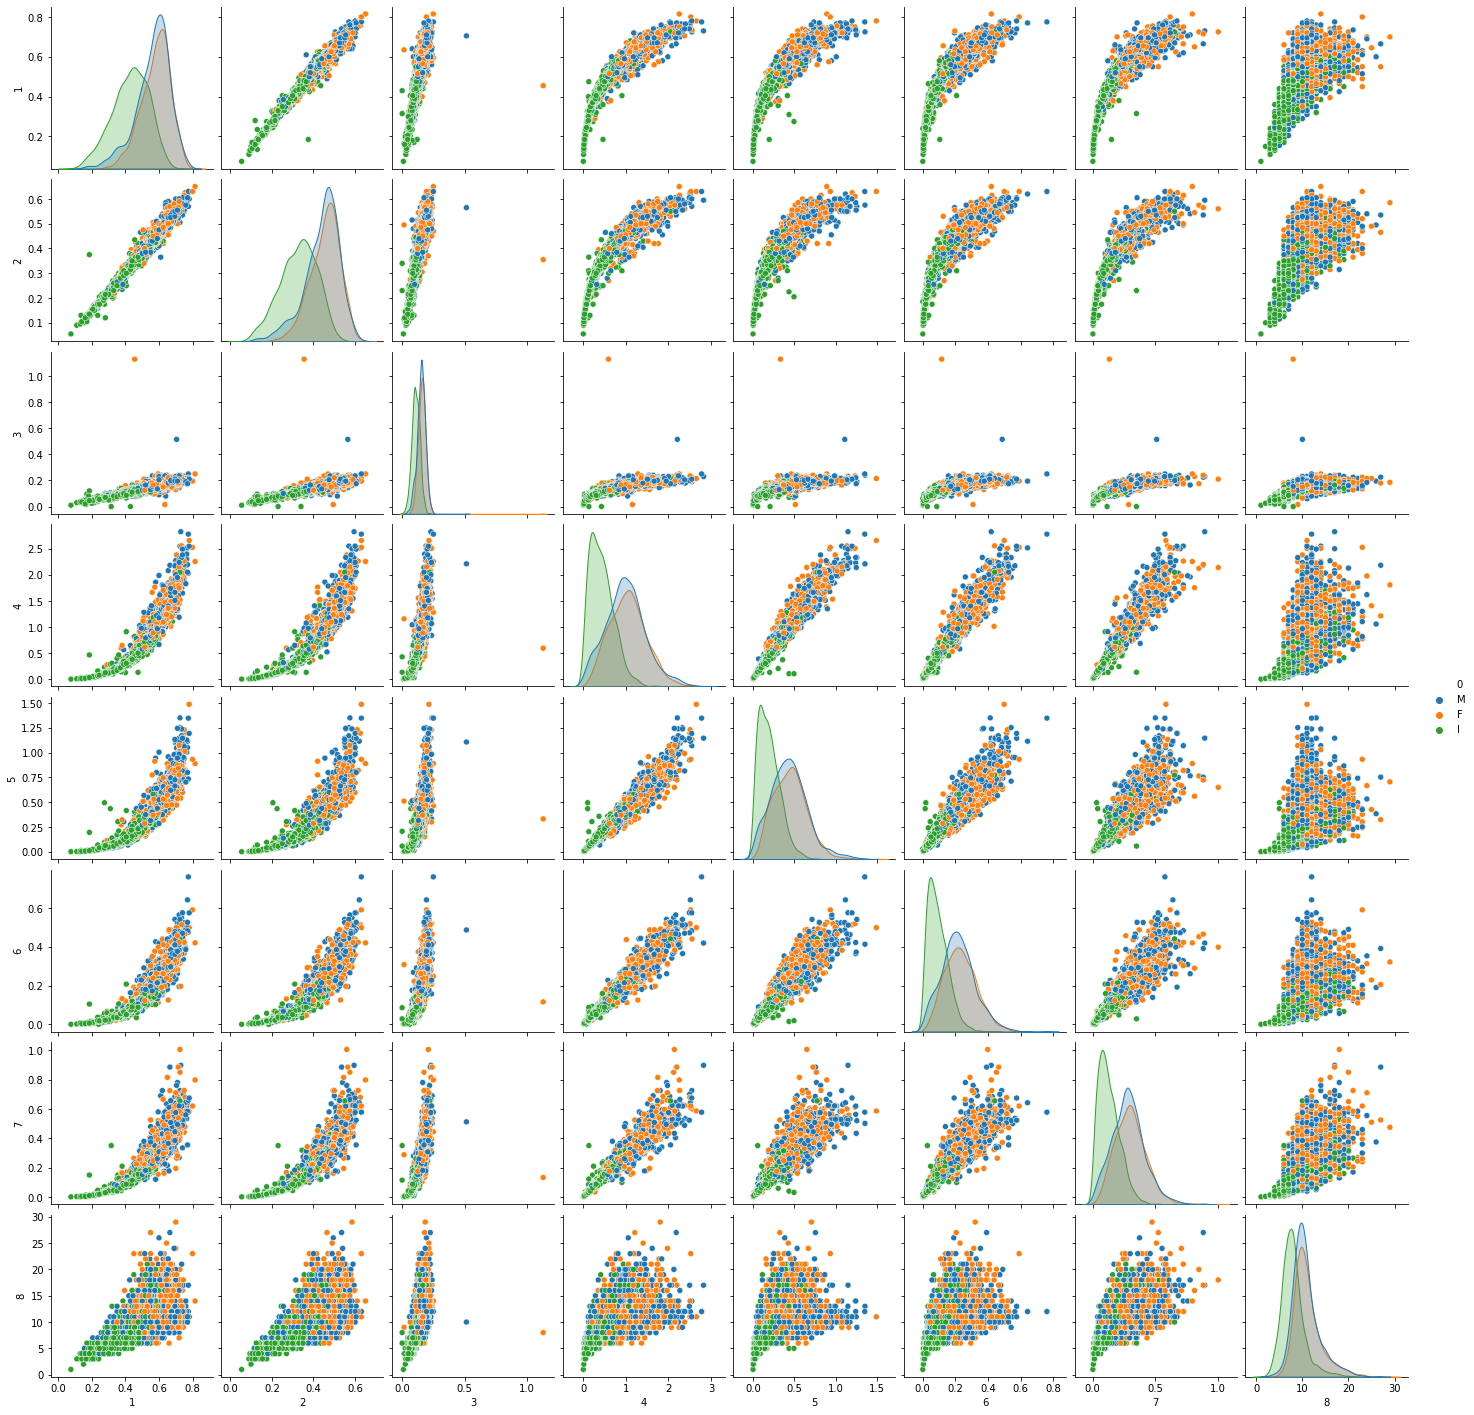

In [78]:
sns.pairplot(df,hue=0)

In [87]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [88]:
X_train.shape

(2923, 9)

In [89]:
y_train.shape

(2923,)

In [90]:
X_test.shape

(1254, 9)

In [91]:
y_test.shape

(1254,)

In [92]:
y_train

895      7.5
3556    10.5
2742     9.5
911      8.5
3301    12.5
        ... 
3480     9.5
3315    10.5
4026     8.5
2099    11.5
1235     8.5
Name: 8, Length: 2923, dtype: float64

In [93]:
dt=DecisionTreeRegressor()

In [94]:
dt.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


DecisionTreeRegressor()

In [95]:
dt.score(X_test,y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


0.0795820353658856

**Bayesian Search**

In [96]:
from hyperopt import fmin,hp,STATUS_OK,tpe,Trials
import hyperopt
from hyperopt.pyll.base import scope

In [97]:
from sklearn.metrics import make_scorer,mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [98]:
dt=DecisionTreeRegressor()

In [99]:
params={'max_leaf_nodes':scope.int(hp.quniform('max_leaf_nodes',10,18,1)),
        'min_samples_leaf':scope.int(hp.quniform('min_samples_leaf',10,16,1)),
        'min_samples_split':scope.int(hp.quniform('min_samples_split',10,16,1)),
        'max_depth':scope.int(hp.quniform('max_depth',6,20,1)),'ccp_alpha':hp.uniform('ccp_alpha',0.001,0.1)}

In [100]:
def rmse(y_act,y_pred):
  return np.sqrt(np.mean((y_act-y_pred)**2))

rmse=make_scorer(rmse,greater_is_better=False)

In [101]:
def hp_obj_func_dt(param):
  dt=DecisionTreeRegressor(**param)
  out=cross_val_score(dt,X=X_train,y=y_train,scoring=rmse,cv=5).mean()
  return out

def surr_func_dt(params):
  perf=hp_obj_func_dt(params)
  return{'loss':-perf,'status':STATUS_OK} 

In [103]:
import warnings
warnings.filterwarnings('ignore')

In [104]:
trials=Trials()
best=fmin(surr_func_dt,space=params,algo=tpe.suggest,max_evals=100,trials=trials)
print(best)

100%|██████████| 100/100 [00:08<00:00, 12.11it/s, best loss: 2.3200945218082216]
{'ccp_alpha': 0.023432561301066586, 'max_depth': 7.0, 'max_leaf_nodes': 18.0, 'min_samples_leaf': 13.0, 'min_samples_split': 14.0}


In [105]:
print(best)

{'ccp_alpha': 0.023432561301066586, 'max_depth': 7.0, 'max_leaf_nodes': 18.0, 'min_samples_leaf': 13.0, 'min_samples_split': 14.0}


In [106]:
best

{'ccp_alpha': 0.023432561301066586,
 'max_depth': 7.0,
 'max_leaf_nodes': 18.0,
 'min_samples_leaf': 13.0,
 'min_samples_split': 14.0}

In [107]:
dt=DecisionTreeRegressor(ccp_alpha=0.023432561301066586,max_depth=7,max_leaf_nodes=18,min_samples_leaf=13,min_samples_split=14)

In [108]:
dt.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.023432561301066586, max_depth=7,
                      max_leaf_nodes=18, min_samples_leaf=13,
                      min_samples_split=14)

In [109]:
dt.score(X_train,y_train)

0.5462876970006708

**Random Forest**

In [110]:
from sklearn.metrics import r2_score

In [111]:
from sklearn.ensemble import RandomForestRegressor

In [118]:
def r2(y_act,y_pred):
  return(r2_score(y_act,y_pred))

r2_s=make_scorer(r2)

In [119]:
params={'max_leaf_nodes':scope.int(hp.quniform('max_leaf_nodes',10,18,1)),
        'min_samples_leaf':scope.int(hp.quniform('min_samples_leaf',10,16,1)),
        'min_samples_split':scope.int(hp.quniform('min_samples_split',10,16,1)),
        'max_depth':scope.int(hp.quniform('max_depth',6,20,1)),'ccp_alpha':hp.uniform('ccp_alpha',0.001,0.1),
        "n_estimators":scope.int(hp.quniform("n_estimators",20, 200,20))}
        

In [120]:
def hp_obj_func_rf(param):
  rf=RandomForestRegressor(**param)
  out=cross_val_score(rf,X=X_train,y=y_train,scoring=r2_s,cv=5).mean()
  return out

def surr_func_rf(params):
  perf=hp_obj_func_rf(params)
  return{'loss':-perf,'status':STATUS_OK} 

In [121]:
trials=Trials()
best=fmin(surr_func_rf,space=params,algo=tpe.suggest,max_evals=100,trials=trials)
print(best)

100%|██████████| 100/100 [05:40<00:00,  3.40s/it, best loss: -0.5424837126971884]
{'ccp_alpha': 0.011987971554896393, 'max_depth': 6.0, 'max_leaf_nodes': 18.0, 'min_samples_leaf': 11.0, 'min_samples_split': 16.0, 'n_estimators': 200.0}
